<a href="https://colab.research.google.com/github/a6ishek/Ipynb_Files_ML-DL/blob/main/Sample_pneumonia_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow.keras as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

In [ ]:
file_name = "/content/drive/My Drive/archive (5).zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Completed")

Completed


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image


In [ ]:
#Training model
model = Sequential()   ## creating a blank model
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))    ### reduce the overfitting

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())    ### input layer
model.add(Dense(64,activation='relu'))    ## hidden layer of ann
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))   ## output layer

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
#Moulding train images
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [ ]:
#Reshaping test and validation images
train_generator = train_datagen.flow_from_directory(
    '/content/xray_dataset_covid19/train',
    target_size = (224,224),
    batch_size = 10,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    '/content/xray_dataset_covid19/test',
    target_size = (224,224),
    batch_size = 10,
    class_mode = 'binary')


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
#### Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=4,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps=1
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
4/4 [==============================] - 2s 510ms/step - loss: 0.7717 - accuracy: 0.5000 - val_loss: 0.6883 - val_accuracy: 0.3000
Epoch 2/20
4/4 [==============================] - 2s 516ms/step - loss: 0.9352 - accuracy: 0.2632 - val_loss: 0.6984 - val_accuracy: 0.4000
Epoch 3/20
4/4 [==============================] - 2s 556ms/step - loss: 0.6951 - accuracy: 0.4500 - val_loss: 0.6935 - val_accuracy: 0.4000
Epoch 4/20
4/4 [==============================] - 2s 569ms/step - loss: 0.6903 - accuracy: 0.5263 - val_loss: 0.6925 - val_accuracy: 0.4000
Epoch 5/20
4/4 [==============================] - 2s 477ms/step - loss: 0.6941 - accuracy: 0.5263 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 2s 604ms/step - loss: 0.6895 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 2s 471ms/step - loss: 0.6442 - acc

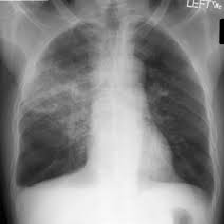

In [ ]:
img = image.load_img('pneumonia.jpg',target_size=(224,224))
img

In [ ]:
img = image.img_to_array(img)
img

array([[[194., 194., 194.],
        [194., 194., 194.],
        [196., 196., 196.],
        ...,
        [122., 122., 122.],
        [125., 125., 125.],
        [128., 128., 128.]],

       [[136., 136., 136.],
        [137., 137., 137.],
        [138., 138., 138.],
        ...,
        [128., 128., 128.],
        [130., 130., 130.],
        [133., 133., 133.]],

       [[132., 132., 132.],
        [132., 132., 132.],
        [134., 134., 134.],
        ...,
        [119., 119., 119.],
        [112., 112., 112.],
        [117., 117., 117.]],

       ...,

       [[  4.,   4.,   4.],
        [  2.,   2.,   2.],
        [  3.,   3.,   3.],
        ...,
        [ 46.,  46.,  46.],
        [ 38.,  38.,  38.],
        [ 31.,  31.,  31.]],

       [[  3.,   3.,   3.],
        [  1.,   1.,   1.],
        [  3.,   3.,   3.],
        ...,
        [ 44.,  44.,  44.],
        [ 37.,  37.,  37.],
        [ 30.,  30.,  30.]],

       [[  3.,   3.,   3.],
        [  1.,   1.,   1.],
        [  3.,  

In [ ]:
img = np.expand_dims(img,axis=0)#flatten

In [ ]:
ypred = np.argmax(model.predict(img), axis=-1)
ypred

array([0])